<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [ ]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [ ]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN, LSTM

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

batch_size = 32
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [ ]:
lstm = Sequential()
lstm.add(Embedding(max_features, 128))

lstm.add(LSTM(128))
lstm.add(Dropout(0.25))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3965440   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 4,097,153
Trainable params: 4,097,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = lstm.fit(X_train, y_train,
                        batch_size=batch_size, 
                        epochs=5, 
                        validation_data=(X_test,y_test))

Epoch 1/5
281/281 [==============================] - 17s 59ms/step - loss: -228.1813 - accuracy: 0.0498 - val_loss: -368.9162 - val_accuracy: 0.0396
Epoch 2/5
281/281 [==============================] - 16s 55ms/step - loss: -507.1154 - accuracy: 0.0499 - val_loss: -633.8333 - val_accuracy: 0.0396
Epoch 3/5
281/281 [==============================] - 16s 56ms/step - loss: -781.5607 - accuracy: 0.0499 - val_loss: -904.4118 - val_accuracy: 0.0396
Epoch 4/5
281/281 [==============================] - 15s 55ms/step - loss: -1050.8822 - accuracy: 0.0499 - val_loss: -1169.7478 - val_accuracy: 0.0396
Epoch 5/5
281/281 [==============================] - 16s 56ms/step - loss: -1318.3528 - accuracy: 0.0499 - val_loss: -1433.8087 - val_accuracy: 0.0396


In [ ]:
lstm.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

lstm.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = lstm.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

71/71 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0396
Test score: nan
Test accuracy: 0.03962600231170654


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Answer: pad_sequences can be used to pad variable lenght sequences, the default value is 0 which is appropriate for most applicable but can be changed by specifying the preffered value using "value" argument. 

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Answer: LSTM is capable of remembering information for a long periods of time in their default behaviour. For RNN are called recurrent because they perform the same task for every element of sequence, it also allow us to operate over sequence of vectors, it can memorize/remember previous inputs in memory when a huge set of Sequential data is given to it.






## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*



RNN
1.   Language Modelling and Generating Text - useful for translation since the most likely sentence would be the one that is correct.
2.   Machine Translation - translating text from one language to another uses one or the other form of RNN.
3.  Speech Recognition - predicting phonetic segments based on input sound waves, thus formulating a word.



<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [30]:
!pip install google_images_download


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense


cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [67]:
def identify_image(image):
    i = np.resize(np.array([image]), (1, 224, 224, 3)).astype('float32')
    
    pred = int(round(cnn.predict(i)[0,0]))
    
    if pred == 0:
        print("images")

In [68]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt

images = imread_collection('/content/sample_data/frog_images/*.jpg')



In [69]:
print(type(images))



<class 'skimage.io.collection.ImageCollection'>


images
None


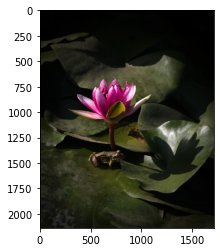

In [70]:

plt.imshow(images[0]);
print(identify_image(images[0]))

In [71]:
images

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [43]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
# TODO - your code!
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`
    function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    types_of_frogs = ['bullfrog', 'tree frog', 'tailed frog']
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    for entry in results:
        if entry[1] in types_of_frogs:
            return True
    return False


In [80]:
import os
col_dir = '/content/sample_data/frog_images'
images = []
for filename in os.listdir(col_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       images.append(filename)

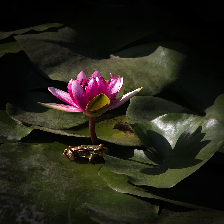

In [103]:
process_img_path('/content/sample_data/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg')

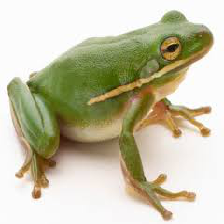

In [104]:
process_img_path('/content/sample_data/frog_images/frog_1.jpg')

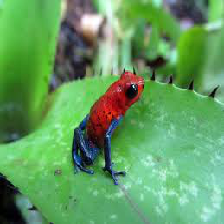

In [109]:
process_img_path('/content/sample_data/frog_images/frog_2.jpg')

In [110]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt

images_sample = imread_collection('/content/sample_data/frog_images/*.jpg')


images
None


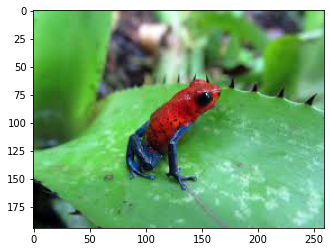

In [112]:
plt.imshow(images_sample[5]);
print(identify_image(images_sample[5]))

None


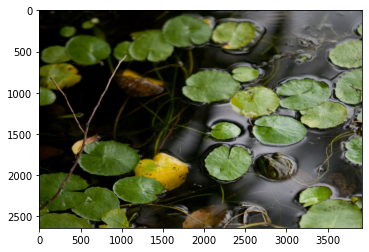

In [113]:
plt.imshow(images_sample[9]);
print(identify_image(images_sample[9]))

In [120]:
for each_image in images:
   print(f'{each_image} contains a frog:',img_contains_frog(process_img_path(f'/content/sample_data/frog_images/{each_image}')))

40960/35363 [==================================] - 0s 0us/step
yanna-zissiadou-SV-aMgliWNs-unsplash.jpg contains a frog: False
mche-lee-j-P8z4EOgyQ-unsplash.jpg contains a frog: False
priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg contains a frog: True
joel-henry-Rcvf6-n1gc8-unsplash.jpg contains a frog: False
ed-van-duijn-S1zA6AR50X8-unsplash.jpg contains a frog: True
cristiane-teston-bcnfJvEYm1Y-unsplash.jpg contains a frog: False
elizabeth-explores-JZybccsrB-0-unsplash.jpg contains a frog: False
jared-evans-VgRnolD7OIw-unsplash.jpg contains a frog: True
zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg contains a frog: False
marcus-neto-fH_DOdTt-pA-unsplash.jpg contains a frog: False
jacky-watt-92W5jPbOj48-unsplash.jpg contains a frog: False
serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg contains a frog: False
saturday_sun-_q37Ca0Ll4o-unsplash.jpg contains a frog: True
matthew-kosloski-sYkr-M78H6w-unsplash.jpg contains a frog: True
drew-brown-VBvoy5gofWg-unsplash.jpg contains a frog: True


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 


-image reconstruction

-image denoising

-sequence to sequence prediction using autoencoders

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

  Answer: I have a problem-solving attitude now unlike before.

- What area of Data Science would you most like to learn more about, and why?

  Answer: cleaning data and prediction.

- Where do you think Data Science will be in 5 years?

  Answer: since the technology is so fast, I can't wait to see a lot of people using robots.

- What are the threats posed by AI to our society?

  Answer: losing a lot of jobs.

- How do you think we can counteract those threats? 

  Answer: to learn technology and be part of it.

- Do you think achieving General Artifical Intelligence is ever possible?

  Answer: yes, and its going so fast.

A few sentences per answer is fine - only elaborate if time allows.


## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [121]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")